In [ ]:
from sklearn.datasets import load_iris,load_breast_cancer,load_digits,load_wine
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold
from sklearn.metrics import classification_report,f1_score,balanced_accuracy_score
import numpy as np
import pandas as pd
import copy
from sklearn.metrics import f1_score,accuracy_score
def custom_f1(y_pred,y_true):
    score=1-f1_score(y_pred=y_pred,y_true=y_true,average="micro")
    return score
def custom_accuracy(y_pred,y_true):
    score=1-balanced_accuracy_score(y_pred=y_pred,y_true=y_true)
    return score
from Steroid.criteria import gini,entropy
from Steroid.impurity import gini_impurity,entropy_impurity
from Steroid.models import dt_classifier,dt_node
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
random_state=42

In [7]:
data=load_iris()
X=data.data
y=data.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=random_state)

In [8]:
clf=dt_classifier(no_features=[X.shape[1]],
                criteria_models={
#                     "Decision node":dt_node(criteria=gini),
#                     "Decision node":dt_node(criteria=entropy),
#                     "Decision node":dt_node(criteria=custom),
#                     "Decision Tree f1_score":dt_node(criteria=gini),
                    "Decision Tree entropy":DecisionTreeClassifier(criterion="entropy",max_depth=1,random_state=random_state),
#                     "Decision Tree gini":DecisionTreeClassifier(criterion="gini",max_depth=1),
#                     "Decision Tree 2":DecisionTreeClassifier(criterion="gini",max_depth=2),
#                      "Logistic Regresion":LogisticRegression(C=1,solver="lbfgs",multi_class="auto",max_iter=1000),
#                      "svc":SVC(kernel="linear",gamma="auto",C=1)
                },
                criteria=gini,
                impurity=gini_impurity,
                random_state=None,
                max_depth=2,
                min_samples=5,
               )
clf.fit(X_train,y_train)
graph=clf.export_graph(criteria_digits=4,show_features=False,show_value=True,show_depth=True,show_samples=True,show_leaves=True,show_criteria=True,show_model=True,show_importance=True,importance_type="percentage")

0
1
1
2


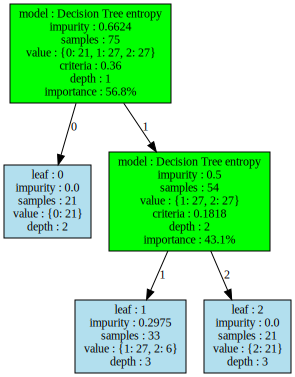

In [9]:
graph

In [12]:
y_pred=clf.predict(X_train)

print(classification_report(y_pred=y_pred,y_true=y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.82      1.00      0.90        27
           2       1.00      0.78      0.88        27

    accuracy                           0.92        75
   macro avg       0.94      0.93      0.92        75
weighted avg       0.93      0.92      0.92        75



In [13]:
y_pred=clf.predict(X_test)
print(classification_report(y_pred=y_pred,y_true=y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.70      1.00      0.82        23
           2       1.00      0.57      0.72        23

    accuracy                           0.87        75
   macro avg       0.90      0.86      0.85        75
weighted avg       0.91      0.87      0.86        75

